In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#解决中文显示问题
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
credit = pd.read_csv('E://credit_risk.csv',encoding="gbk")   #有关信用风险的数据
credit.head()

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
0,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
1,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
2,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
3,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
4,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
Loan Purpose       425 non-null object
Checking           425 non-null int64
Savings            425 non-null int64
Months Customer    425 non-null int64
Months Employed    425 non-null int64
Gender             425 non-null object
Marital Status     425 non-null object
Age                425 non-null int64
Housing            425 non-null object
Years              425 non-null int64
Job                425 non-null object
Credit Risk        425 non-null object
dtypes: int64(6), object(6)
memory usage: 40.0+ KB


In [4]:
print(credit['Loan Purpose'].unique())
print(credit['Gender'].unique())
print(credit['Marital Status'].unique())
print(credit['Housing'].unique())
print(credit['Job'].unique())
print(credit['Credit Risk'].unique())

['Small Appliance' 'Furniture' 'New Car' 'Education' 'Business' 'Used Car'
 'Repairs' 'Other' 'Retraining' 'Large Appliance']
['M' 'F']
['Single' 'Divorced' 'Married']
['Own' 'Rent' 'Other']
['Unskilled' 'Skilled' 'Management' 'Unemployed']
['Low' 'High']


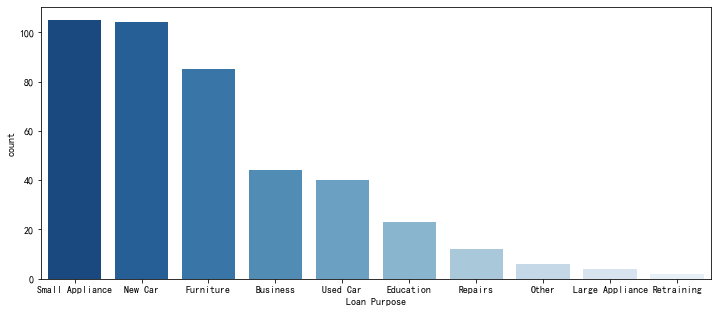

In [5]:
plt.figure(figsize=(12,5))
sns.countplot('Loan Purpose',data=credit,order = credit['Loan Purpose'].value_counts().index,palette='Blues_r')

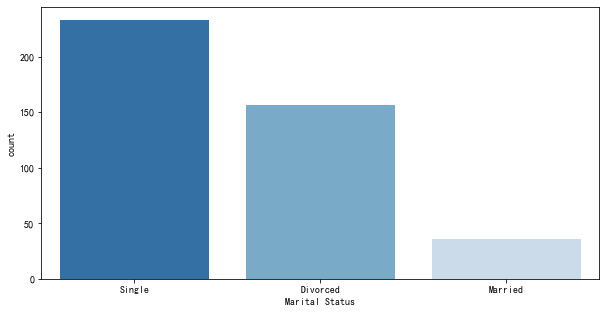

In [8]:
plt.figure(figsize=(10,5))
sns.countplot('Marital Status',data=credit,order = credit['Marital Status'].value_counts().index,palette='Blues_r')

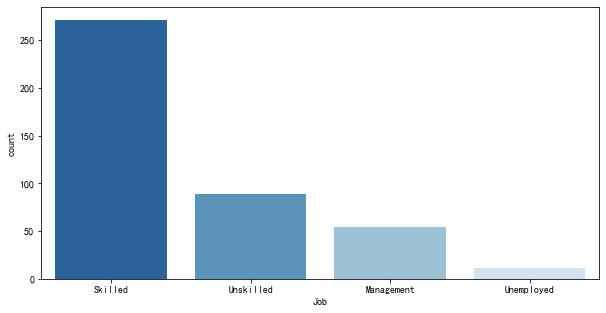

In [7]:
plt.figure(figsize=(10,5))
sns.countplot('Job',data=credit,order = credit['Job'].value_counts().index,palette='Blues_r')

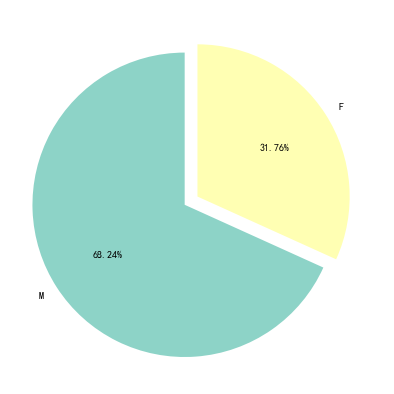

In [10]:
target_list = list(credit['Gender'].value_counts()[2:].index)

ex = [0.1,0] #第一个&第三个单独出来，距离圆心0.1
plt.figure(figsize=(7,7))
credit['Gender'].value_counts().plot.pie(autopct = '%1.2f%%',startangle=90,explode=ex,colors=sns.color_palette("Set3", 2))   
plt.ylabel('')

plt.show()

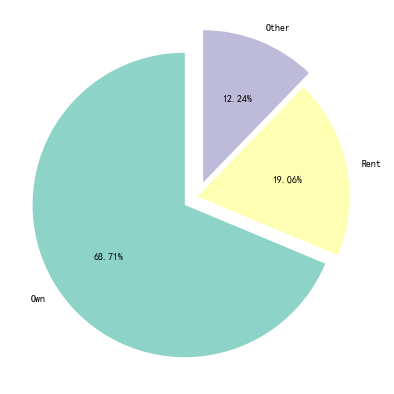

In [11]:
target_list = list(credit['Housing'].value_counts()[3:].index)

ex = [0.1,0,0.1] 
plt.figure(figsize=(7,7))
credit['Housing'].value_counts().plot.pie(autopct = '%1.2f%%',startangle=90,explode=ex,colors=sns.color_palette("Set3", 3))   
plt.ylabel('')

plt.show()

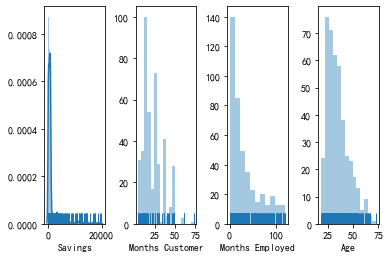

In [28]:
fig,axes=plt.subplots(1,4)      #加入参数sharey=True表示公用y坐标
plt.subplots_adjust(wspace=0.5) #子图间距
sns.distplot(credit['Savings'],rug=True,ax=axes[0],hist=True) #去除直方
sns.distplot(credit['Months Customer'],rug=True,ax=axes[1],kde=False) 
sns.distplot(credit['Months Employed'],rug=True,ax=axes[2],kde=False) 
sns.distplot(credit['Age'],rug=True,ax=axes[3],kde=False)

Text(0, 0.5, 'log(Age)')

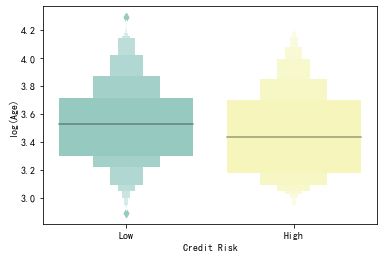

In [17]:
sns.boxenplot(x='Credit Risk',y=log(credit['Age']),data=credit,palette="Set3")
plt.ylabel('log(Age)')

Text(0, 0.5, 'log(Months Customer)')

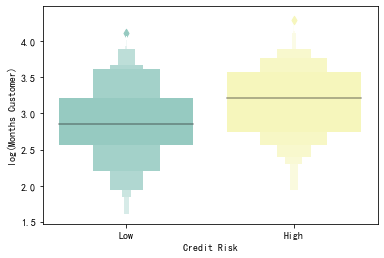

In [19]:
sns.boxenplot(x='Credit Risk',y=log(credit['Months Customer']),data=credit,palette="Set3")
plt.ylabel('log(Months Customer)')

C:\Users\1\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log(Savings)')

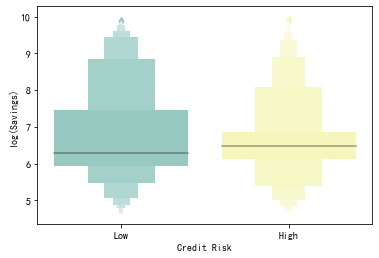

In [20]:
sns.boxenplot(x='Credit Risk',y=log(credit['Savings']),data=credit,palette="Set3")
plt.ylabel('log(Savings)')

C:\Users\1\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log(Monthhs Customer)')

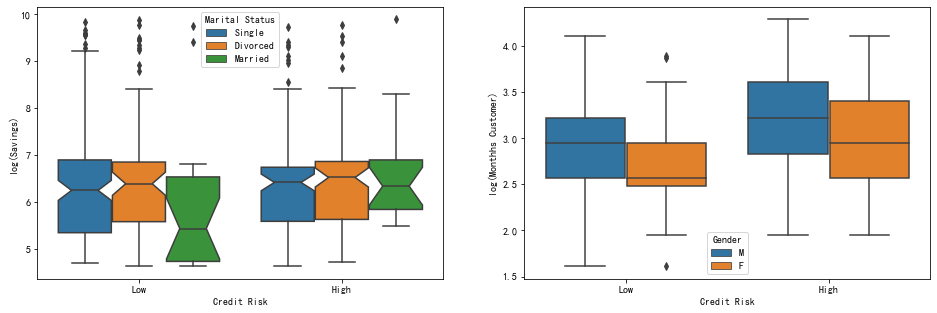

In [33]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(1,2,1)
sns.boxplot(data=credit,x='Credit Risk',y=log(credit['Savings']),hue='Marital Status',notch = True) #中位数置信区间
plt.ylabel('log(Savings)')
ax=fig.add_subplot(1,2,2)
sns.boxplot(data=credit,x='Credit Risk',y=log(credit['Months Customer']),hue='Gender',notch = False) #中位数置信区间
plt.ylabel('log(Monthhs Customer)')

In [35]:
print('本数据集的因变量是Credit Risk，该变量为类别型变量，有两个取值High 和 Low。其他变量是可能对信用风险高低产生影响的自变量。上述可视化依次展示了数据集总体情况，单个变量的分布情况，两个变量之间的关系（主要是Credit Risk 与其他变量），以及三个变量之间的关系（主要是Credit Risk 与其他两个变量）。')

本数据集的因变量是Credit Risk，该变量为类别型变量，有两个取值High 和 Low。其他变量是可能对信用风险高低产生影响的自变量。上述可视化依次展示了数据集总体情况，单个变量的分布情况，两个变量之间的关系（主要是Credit Risk 与其他变量），以及三个变量之间的关系（主要是Credit Risk 与其他两个变量）。
